# COMP90072 Project

## Imports and Initialisations

In [2]:
import sow
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(90072)


## Basic BTW Model

In this section, we explore the basic BTW model to verify the correctness of 
implementation. 

### Toppling Check

The main aim is to check if toppling proceeded as expected.

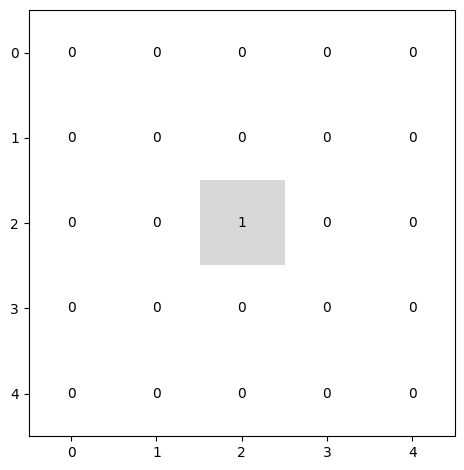

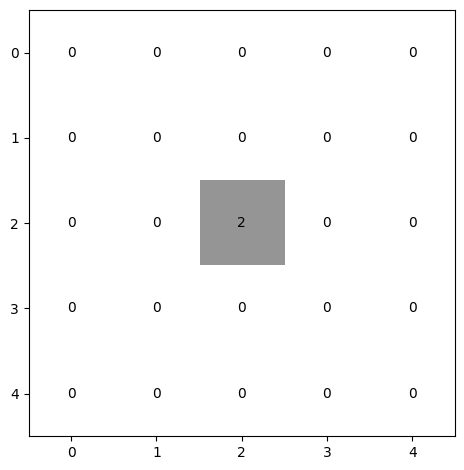

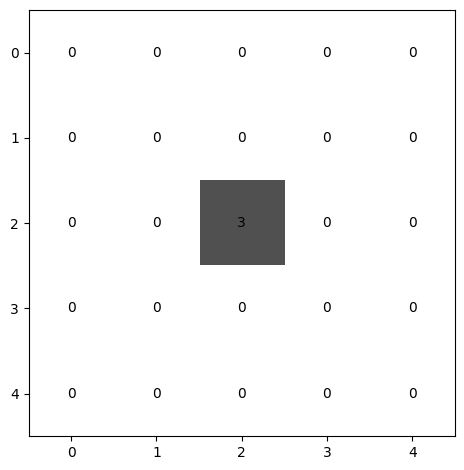

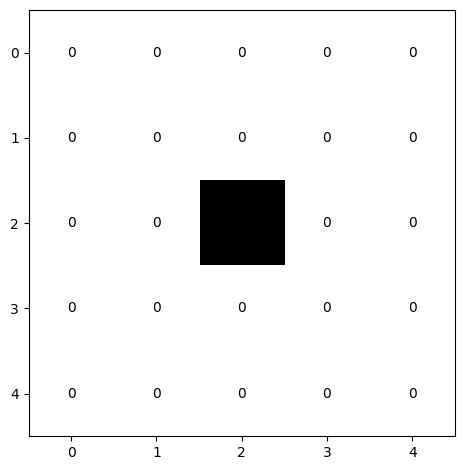

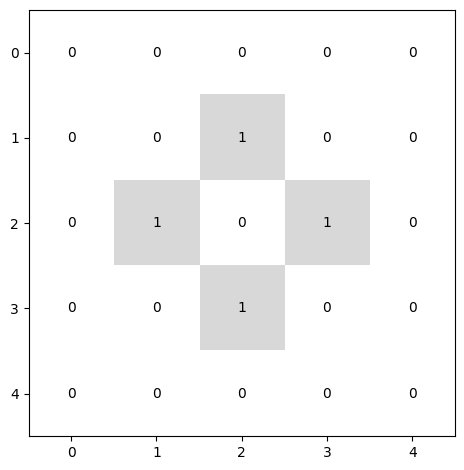

In [3]:
# Make a grid graph and create the model.
graph, boundary = sow.make_grid_graph(5, 5)
model = sow.Model(graph=graph, boundary_vertices=boundary)

# We drop at sand at the same spot to check the model. Notice that the middle 
# point is floor of half the vertex count, by design.
model.manager = sow.ConstantDropper(graph.vcount() // 2)

# Create a custom grid visualiser 
def grid_visualiser(context: sow.SimulationContext):
    return sow.visualise_grid(
        5, 5, context.model.height, max_height=context.model.topple_limit, 
        xticks="auto", yticks="auto", labels="auto")

# Create the listeners. 
image_maker = sow.ImageMaker(visualiser=grid_visualiser)
video_maker = sow.MovieMaker(max_frame=model.t_lim)

model.add_listener([
    image_maker
])

# Run the simulation.
_ = model.simulate(5)

# View the images.
for x in image_maker.images[:5]:
    x[0].show()


### Correctness-check: Pattern at Scale

In this subsection, we check if the pattern of the model matches the expected 
pattern of BTW models, as well as its algorithmic complexity.


In [ ]:
# Make a grid graph and create the model.
graph, boundary = sow.make_grid_graph(99, 99)
model = sow.Model(graph=graph, boundary_vertices=boundary)

# We drop at sand at the same spot to check the model. Notice that the middle 
# point is floor of half the vertex count, by design.
model.manager = sow.ConstantDropper(graph.vcount() // 2)

# No more listeners since they will slow it down. We are only interested in the 
# final image anyway, at this stage.
model.simulate(10_000_000)
model.visualise_as_grid(99, 99)


### Statistics on BTW

In this subsection, we study the mean height of BTW models.


In [2]:
# Make a grid graph and create the model.
graph, boundary = sow.make_grid_graph(20, 20)
model = sow.Model(graph=graph, boundary_vertices=boundary)

# Add the mean collector listener.
mean_collector = sow.StatisticsCollector(sow.ContextTransformer.mean_height)
model.add_listener([mean_collector])

# No more listeners since they will slow it down. We are only interested in the 
# final image anyway, at this stage.
model.simulate(10_000)


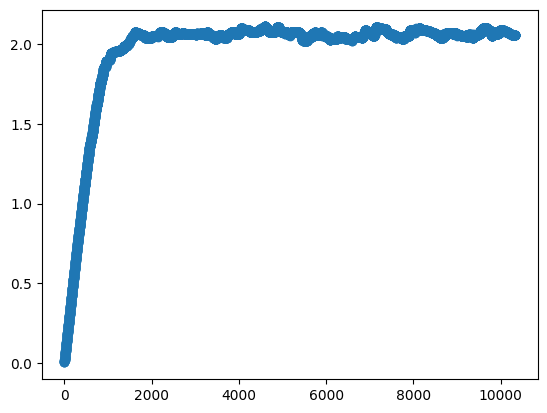

In [4]:
# Plots the result as a graph.
plt.scatter(np.arange(0, len(mean_collector.value_history)), 
            mean_collector.value_history)
plt.show()


### Topple Frequency and Topple Height Distribution

Here we study the toppling behaviour of grid BTW.

In [10]:
# Make a grid graph and create the model.
graph, boundary = sow.make_grid_graph(20, 20)
model = sow.Model(graph=graph, boundary_vertices=boundary)

# Add the mean collector listener.
topple_freq_collector = sow.StatisticsCollector(
    sow.ContextTransformer.topple_occurrence)
topple_loss_collector = sow.StatisticsCollector(
    sow.ContextTransformer.topple_loss)
model.add_listener([topple_freq_collector, topple_loss_collector])

# No more listeners since they will slow it down. We are only interested in the 
# final image anyway, at this stage.
model.simulate(1_000_000)


In [11]:
# This is the proportion of time attributed to toppling.
np.mean(topple_freq_collector.value_history)

0.9435014859346189

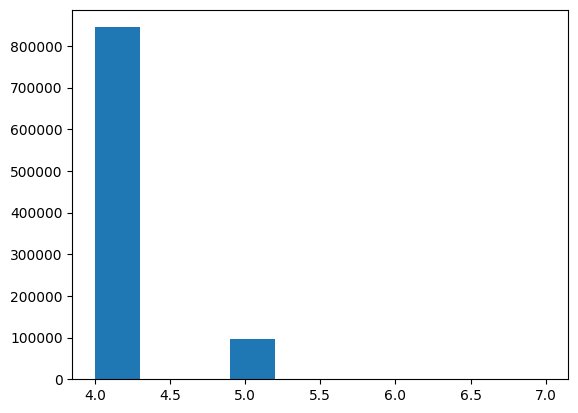

In [12]:
# This is the toppling height distribution.
plt.hist(topple_height_collector.value_history)
plt.show()

## The Graph Extension of BTW

Now we consider the more general case where we 

In [ ]:
# Make a grid graph and create the model.
graph, boundary = sow.make_grid_graph(20, 20)
model = sow.Model(graph=graph, boundary_vertices=boundary)

# Add the mean collector listener.
topple_freq_collector = sow.StatisticsCollector(
    sow.ContextTransformer.topple_occurrence)
topple_height_collector = sow.StatisticsCollector(
    sow.ContextTransformer.topple_height)
model.add_listener([topple_freq_collector, topple_height_collector])

# No more listeners since they will slow it down. We are only interested in the 
# final image anyway, at this stage.
model.simulate(1_000_000)
